```
Name: Reena
Register ID: 22122144
Class: 3 MSc DS B
```

## <center>CAC 2</center>
#### <center>Twitter Account Profiling and Identification of Bots</center>

**PROBLEM STATEMENT**  
Twitter is among the most popular social media platforms in the world with 206 million users.

Bots on Twitter are a type of software that controls the account with Twitter APIs. Bots constitue about 20 to 65 million users of Twitter. Twitter bots are a problem because they mitigate desemination of unbiased factual information. Elon Musk, owner of Twitter, proposed a paid approach to reduce the number of bots on the platform. Yet there will always be some bots on the platform.

This implementation will propose a technique to differentate a bot from a regular user account.

**DATASET DESCRIPTION**  
The dataset was taken from Kaggle; Twitter Bot Detection Dataset   
The link to the dataset is given here: https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset?select=bot_detection_data.csv

**Attributes**  
1. ***User ID*** : (int) user id given to each unique twitter account  
2. ***Username*** : (String) username associated with the twitter account  
3. ***Tweet*** : (String) the textual content on the post  
4. ***Retweet Count*** : (int) describes the retweet count the particular post has  
5. ***Mention Count*** : (int) describes how many mentions i.e., @ were used in the post  
6. ***Follower Count*** : (int) describes the number of followers the account has  
7. ***Verified*** : (Boolean) describes whether the account is verified or not where true represents verifed and false represents non-verified users  
8. ***Location*** : (String) this column talks about the location associated with that post  
9. ***Created At*** : (DateTime) this attribute describes the date and time of creation of a Tweet  
10. ***Hashtags*** : (String) the # used in the textual content of the post  
11. ***Bot Label***: (Binary) whether the account is a bot or a regular user where 1 represents bots and 0 represents regular users  

In [1]:
#IMPORTING PACKAGES

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import string
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import pos_tag

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Post_Grad\Semester_3\NLP\Data\bot_detection_data.csv")
df.head(7)

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
5,570928,james00,See wonder travel this suffer less yard office...,41,4,3792,True,1,West Cheyenne,2023-05-07 22:24:47,anyone respond perhaps market run
6,734182,leonard00,Door final sound my guess building rich.,54,0,10,True,0,South Donald,2021-01-21 03:02:53,president


#### DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [6]:
df = df.dropna(subset=['Bot Label'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


Posts can contain no hashtags therefore, it would not make sense to fix the null values here. All other columns contain no null values.

#### ENRICHING THE DATA

1. Convert the Verified column to a binary values.
2. Create a column called Hashtag_Count which will show the number of hastags used in each post.

In [8]:
df['Verified']=df['Verified'].apply(lambda x: 0 if x==False else 1)
df['Hashtag_Count'] = df['Hashtags'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else 0)
df['Post_Time'] = df['Created At'].apply(lambda x: str(x).split()[1])
df['Created At'] = df['Created At'].apply(lambda x: str(x).split()[0])

In [9]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags,Hashtag_Count,Post_Time
0,132131,flong,Station activity person against natural majori...,85,1,2353,0,1,Adkinston,2020-05-11,NaN,0,15:29:50
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,1,0,Sanderston,2022-11-26,both live,2,05:18:10
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,1,0,Harrisonfurt,2022-08-08,phone ahead,2,03:16:54
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,1,1,Martinezberg,2021-08-14,ever quickly new I,4,22:27:05
4,704441,noah87,Animal sign six data good or.,26,3,8438,0,1,Camachoville,2020-04-13,foreign mention,2,21:24:21


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Follower Count'] = scaler.fit_transform(df[['Follower Count']])

In [11]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags,Hashtag_Count,Post_Time
0,132131,flong,Station activity person against natural majori...,85,1,0.2353,0,1,Adkinston,2020-05-11,NaN,0,15:29:50
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,0.9617,1,0,Sanderston,2022-11-26,both live,2,05:18:10
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,0.4363,1,0,Harrisonfurt,2022-08-08,phone ahead,2,03:16:54
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,0.2242,1,1,Martinezberg,2021-08-14,ever quickly new I,4,22:27:05
4,704441,noah87,Animal sign six data good or.,26,3,0.8438,0,1,Camachoville,2020-04-13,foreign mention,2,21:24:21


### EDA

In [12]:
bots = df[df['Bot Label'] ==1]
reg_accounts=df[df['Bot Label'] ==0]

In [13]:
bots.describe()[['Retweet Count','Follower Count', 'Hashtag_Count']]

,Retweet Count,Follower Count,Hashtag_Count
count,25018.000000,25018.000000,25018.000000
mean,50.042050,0.499194,2.495283
std,29.171048,0.287629,1.711095
min,0.000000,0.000000,0.000000
25%,25.000000,0.249700,1.000000
50%,50.000000,0.497800,2.000000
75%,75.000000,0.746800,4.000000
max,100.000000,1.000000,5.000000


In [14]:
reg_accounts.describe()[['Retweet Count','Follower Count', 'Hashtag_Count']]

,Retweet Count,Follower Count,Hashtag_Count
count,24982.000000,24982.000000,24982.000000
mean,49.969098,0.498526,2.505244
std,29.191822,0.288125,1.707656
min,0.000000,0.000000,0.000000
25%,25.000000,0.248025,1.000000
50%,50.000000,0.500750,3.000000
75%,75.000000,0.747200,4.000000
max,100.000000,1.000000,5.000000


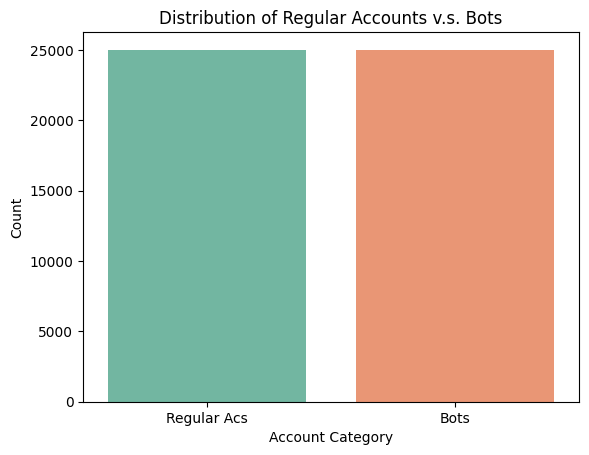

In [15]:
sns.countplot(x=df['Bot Label'], palette="Set2")

plt.xlabel("Account Category")
plt.ylabel("Count")
plt.title("Distribution of Regular Accounts v.s. Bots")
plt.xticks([0,1], ['Regular Acs','Bots'])
plt.show()

There is an almost equal distribution of bots and regular users in the dataset.

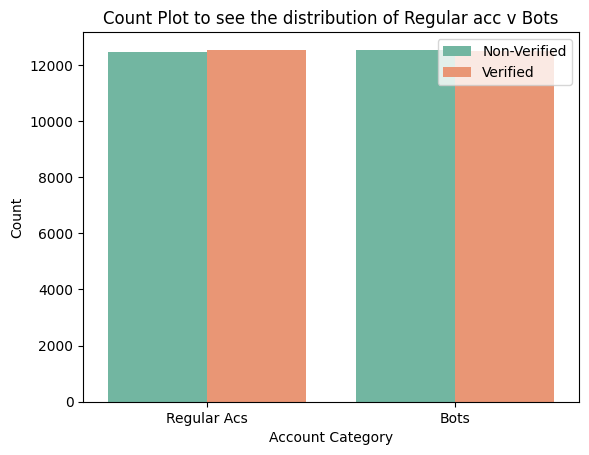

In [16]:
sns.countplot(x=df['Bot Label'], palette="Set2",hue=df['Verified'])  # Adjust the palette as needed

# Display the count plot
plt.xlabel("Account Category")
plt.ylabel("Count")
plt.title("Count Plot to see the distribution of Regular acc v Bots")
plt.xticks([0,1], ['Regular Acs','Bots'])
plt.legend(['Non-Verified','Verified'])
plt.show()

There is an almost equal distribution of verified and non-verified bots and regular users in the dataset.   
We see a lot of similarites between Bots and Regular Users in the numerical data collected.

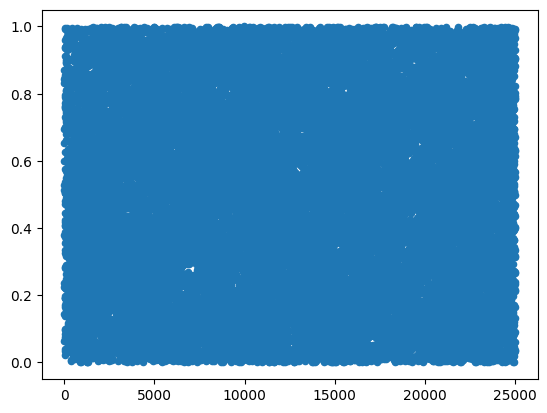

In [17]:
x_values = range(len(bots['Follower Count']))
plt.scatter(x_values, bots['Follower Count'], marker='o', s=20)

plt.show()

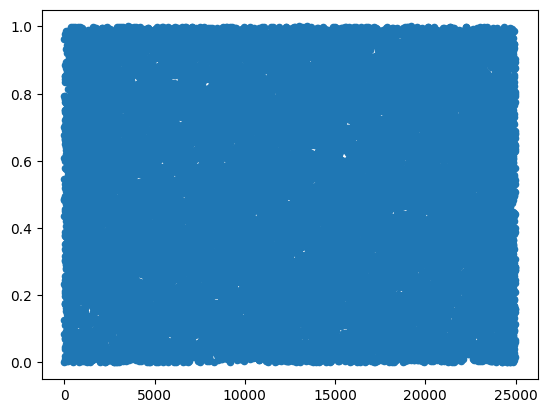

In [18]:
x_values = range(len(reg_accounts['Follower Count']))
plt.scatter(x_values, reg_accounts['Follower Count'], marker='o', s=20)

plt.show()

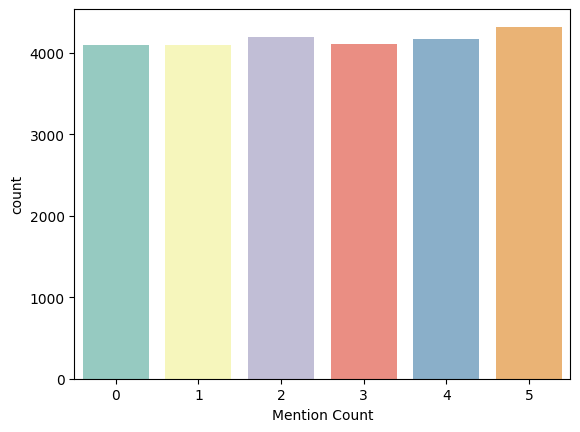

In [19]:
import seaborn as sns

sns.countplot(data=reg_accounts, x='Mention Count', palette="Set3")  # 'x' is the categorical variable
plt.show()

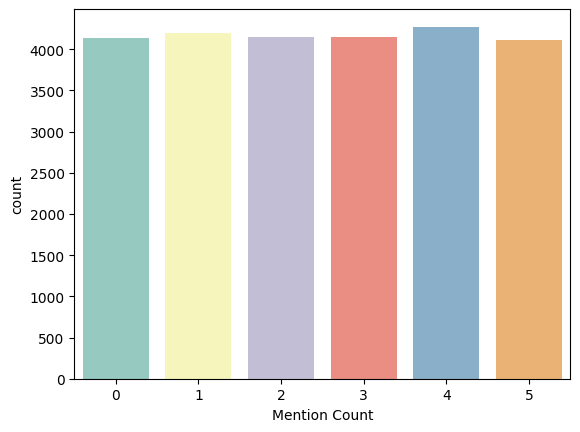

In [20]:
sns.countplot(data=bots, x='Mention Count', palette="Set3")  # 'x' is the categorical variable
plt.show()

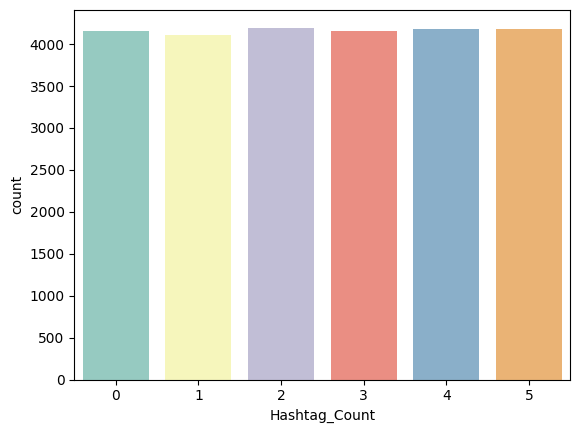

In [21]:
sns.countplot(data=reg_accounts, x='Hashtag_Count', palette="Set3")  # 'x' is the categorical variable
plt.show()

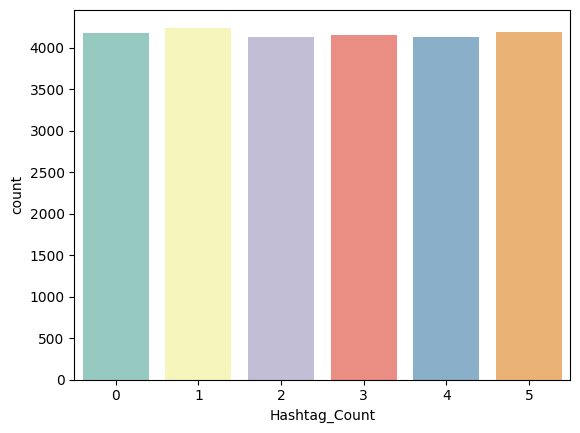

In [22]:
sns.countplot(data=bots, x='Hashtag_Count', palette="Set3")  # 'x' is the categorical variable
plt.show()

### PREP FOR MODELS

In [23]:
# creating a dataset with only the textual data and the label to train with
tweet=df[['Tweet','Bot Label']]
tweet.head()

,Tweet,Bot Label
0,Station activity person against natural majori...,1
1,Authority research natural life material staff...,0
2,Manage whose quickly especially foot none to g...,0
3,Just cover eight opportunity strong policy which.,1
4,Animal sign six data good or.,1


In [24]:
# removing punctuations in the sentence and tokenising each sentence
tweet['Tokens'] = tweet['Tweet'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in string.punctuation])

C:\Users\HP\AppData\Local\Temp\ipykernel_29396\1650591052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens'] = tweet['Tweet'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in string.punctuation])


In [25]:
tweet.head()

,Tweet,Bot Label,Tokens
0,Station activity person against natural majori...,1,"[station, activity, person, against, natural, ..."
1,Authority research natural life material staff...,0,"[authority, research, natural, life, material,..."
2,Manage whose quickly especially foot none to g...,0,"[manage, whose, quickly, especially, foot, non..."
3,Just cover eight opportunity strong policy which.,1,"[just, cover, eight, opportunity, strong, poli..."
4,Animal sign six data good or.,1,"[animal, sign, six, data, good, or]"


In [32]:
tweet.head()
bots = tweet[tweet['Bot Label'] ==1]
reg_accounts=tweet[tweet['Bot Label'] ==0]

In [33]:
unique_tokens = [*set(word for listValue in tweet['Tokens'] for word in listValue)]
unique_tokens_bots = [*set(word for listValue in bots['Tokens'] for word in listValue)] 
unique_tokens_reg_user = [*set(word for listValue in reg_accounts['Tokens'] for word in listValue)]

In [34]:
unique_tokens_count=list()


for word in unique_tokens:
  count=0
  for listToCheck in tweet['Tokens']:
    count+=listToCheck.count(word)
  unique_tokens_count.append(count)

In [36]:
totalWordCount=pd.DataFrame(unique_tokens_count, columns=['Word_Count'])
totalWordCount.index = unique_tokens

In [37]:
totalWordCount.head()

,Word_Count
guy,443
participant,471
know,470
add,449
position,512


In [38]:
unique_bot_tokens_probability=list()

for word in unique_tokens_bots:
  count=0
  for index, row in bots.iterrows():
    count+=row['Tokens'].count(word)
  unique_bot_tokens_probability.append(count)

In [ ]:
unique_reg_tokens_probability=list()

for word in unique_tokens_bots:
  count=0
  for index, row in reg_accounts.iterrows():
    count+=row['Tokens'].count(word)
  unique_reg_tokens_probability.append(count)

In [69]:
bot_probability=pd.DataFrame(unique_bot_tokens_probability,columns=['Word_Probability'])
bot_probability.index=unique_tokens_bots

In [70]:
bot_probability.head()

,Word_Probability
hand,0
analysis,0
range,0
sign,0
ok,0


In [72]:
print(bot_probability.loc['person'])

Word_Probability    0
Name: person, dtype: int64


### SELF PROPOSED METHOD USING BAYES THEOREM

In [14]:
def findProbabilityOfPOS(tweet,POS):
    total_probability=bot_probability=reg_user_probability=0

    for index in tweet.index:
        total_probability+=[tag for word, tag in pos_tag(word_tokenize(' '.join(tweet.loc[index, 'Tokens'])))].count(POS)
        if tweet.loc[index, 'Bot Label']==1: bot_probability+=[tag for word, tag in pos_tag(word_tokenize(' '.join(tweet.loc[index, 'Tokens'])))].count(POS)
        if tweet.loc[index, 'Bot Label']==0: reg_user_probability+=[tag for word, tag in pos_tag(word_tokenize(' '.join(tweet.loc[index, 'Tokens'])))].count(POS)

    return (bot_probability/total_probability),(reg_user_probability/total_probability)

In [15]:
def findProbability(tweet,word):
    total_probability=bot_probability=reg_user_probability=0

    for index in tweet.index:
        total_probability+=tweet.loc[index, 'Tokens'].count(word)
        if tweet.loc[index, 'Bot Label']==1: bot_probability+=tweet.loc[index, 'Tokens'].count(word)
        if tweet.loc[index, 'Bot Label']==0: reg_user_probability+=tweet.loc[index, 'Tokens'].count(word)

    if total_probability==0:
        return findProbabilityOfPOS(tweet,nltk.pos_tag([word])[0][1])
    else:
        return (bot_probability/total_probability),(reg_user_probability/total_probability)


In [16]:
def convertSentence(sentence):
    sentence_tokens=[word for word in word_tokenize(sentence.lower()) if word not in string.punctuation and word.isalpha()]
    return sentence_tokens

In [17]:
def predict(tokens):
    bot_probability=reg_user_probability=1

    for i in tokens:
        a,b=findProbability(tweet,i)
        bot_probability*=a
        reg_user_probability*=b

    if bot_probability>reg_user_probability:
        return 1
    else:
        return 0

In [18]:
def findAccuracy(tweets):
  accuaracy=0

  for a,b in zip(df['Bot Label'],df['predictions']):
    if a==b:
      accuaracy+=1
  return accuaracy

In [ ]:
print(predict(tweet['Tokens'][0]))

In [20]:
print(predict(tweet['Tokens'][1]))

0


In [21]:
print(predict(tweet['Tokens'][2]))

0


In [26]:
print(predict(tweet['Tokens'][3]))

0


In [25]:
print(predict(tweet['Tokens'][4]))

0


In [ ]:
tweet['predictions']= tweet['Tokens'].apply(lambda x: predict(tweet['Tokens'][0]))

In [ ]:
spm_accuracy=findAccuracy(tweet)

### LOGISTIC REGRESSION

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Count Vectorizor

In [18]:
count_vectorizer = CountVectorizer()

X=count_vectorizer.fit_transform(tweet['Tweet'])
X_countVec=DataFrame(X.toarray(),columns=count_vectorizer.get_feature_names_out())
y_countVec  = tweet['Bot Label']

In [19]:
X_countVec

,ability,able,about,above,accept,according,account,across,act,action,...,wrong,yard,yeah,year,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train_countVec , X_test_countVec , y_train_countVec , y_test_countVec  = train_test_split(X_countVec , y_countVec , test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()

model.fit(X_train_countVec , y_train_countVec )

y_pred_countVec  = model.predict(X_test_countVec )

In [22]:
lg_cv_accuracy = accuracy_score(y_test_countVec, y_pred_countVec )
print(f'Accuracy: {lg_cv_accuracy}')

Accuracy: 0.5066


#### TF-IDF Vectorizor (Term Frequency-Inverse Document Frequency)

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X = tfidf_vectorizer.fit_transform(tweet['Tweet'])
X_tfidf=DataFrame(X.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
y_tfidf  = tweet['Bot Label']

In [24]:
X_train_tfidf , X_test_tfidf , y_train_tfidf , y_test_tfidf  = train_test_split(X_tfidf , y_tfidf , test_size=0.2, random_state=42)

In [25]:
model.fit(X_train_tfidf , y_train_tfidf )

y_pred_tfidf  = model.predict(X_test_tfidf )

In [26]:
lg_tfidf_accuracy = accuracy_score(y_test_tfidf , y_pred_tfidf )
print(f'Accuracy: {lg_tfidf_accuracy}')

Accuracy: 0.5045


### NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

#### Count Vectorizor

In [28]:
clf = GaussianNB()
clf.fit(X_train_countVec, y_train_countVec)

GaussianNB()

In [29]:
y_pred_countVec = clf.predict(X_test_countVec)

In [30]:
nb_cv_accuracy = accuracy_score(y_test_countVec, y_pred_countVec)
report = classification_report(y_test_countVec, y_pred_countVec)
matrix = confusion_matrix(y_test_countVec, y_pred_countVec)

print("Accuracy:", nb_cv_accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.5008
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      4968
           1       0.50      0.50      0.50      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Confusion Matrix:
 [[2501 2467]
 [2525 2507]]


#### TF-IDF Vectorizor

In [31]:
clf.fit(X_train_tfidf, y_train_tfidf)

GaussianNB()

In [32]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [33]:
nb_tfidf_accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
report = classification_report(y_test_tfidf, y_pred_tfidf)
matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print("Accuracy:", nb_tfidf_accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.4992
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      4968
           1       0.50      0.49      0.50      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Confusion Matrix:
 [[2504 2464]
 [2544 2488]]


### ANN

In [34]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train_countVec.shape

(16876, 969)

In [35]:
X_train = np.array(X_train_countVec)
y_train = np.array(y_train_countVec)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(969,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
1125/1125 [==============================] - 7s 5ms/step - loss: 0.6940 - accuracy: 0.4971 - val_loss: 0.6940 - val_accuracy: 0.4935
Epoch 2/20
1125/1125 [==============================] - 5s 4ms/step - loss: 0.6795 - accuracy: 0.5752 - val_loss: 0.7023 - val_accuracy: 0.4915
Epoch 3/20
1125/1125 [==============================] - 6s 5ms/step - loss: 0.6075 - accuracy: 0.6737 - val_loss: 0.7687 - val_accuracy: 0.4880
Epoch 4/20
1125/1125 [==============================] - 5s 4ms/step - loss: 0.4325 - accuracy: 0.8105 - val_loss: 0.9369 - val_accuracy: 0.4997
Epoch 5/20
1125/1125 [==============================] - 6s 5ms/step - loss: 0.2327 - accuracy: 0.9190 - val_loss: 1.2099 - val_accuracy: 0.4922
Epoch 6/20
1125/1125 [==============================] - 5s 4ms/step - loss: 0.1034 - accuracy: 0.9737 - val_loss: 1.5974 - val_accuracy: 0.4908
Epoch 7/20
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0432 - accuracy: 0.9920 - val_loss: 1.9513 - val_accuracy:

In [41]:
X_test = np.array(X_test_countVec)
y_test = np.array(y_test_countVec)

In [42]:
# Evaluate the model on the test set
loss, ann_accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {ann_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 4.0414 - accuracy: 0.4917
Accuracy: 0.4916999936103821


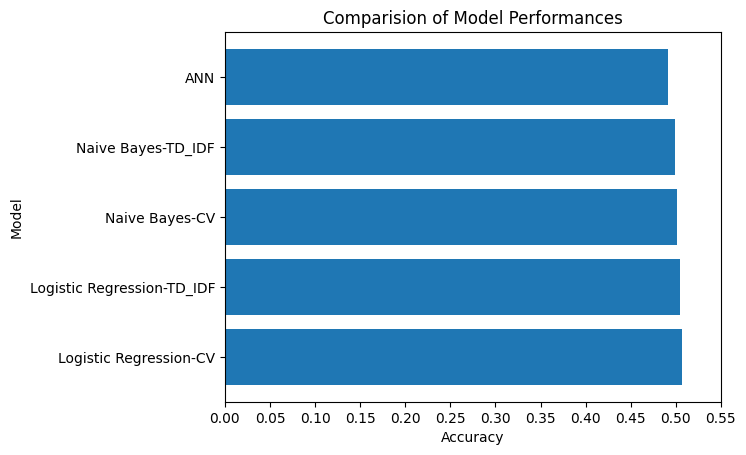

In [66]:
plt.barh(['Logistic Regression-CV','Logistic Regression-TD_IDF','Naive Bayes-CV','Naive Bayes-TD_IDF','ANN'], [lg_cv_accuracy,lg_tfidf_accuracy,nb_cv_accuracy,nb_tfidf_accuracy,ann_accuracy])

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparision of Model Performances')

tick_values = np.arange(0, 0.6, 0.05)
plt.xticks(tick_values)

plt.show()

## ANALYSIS